Chapter 17

# 梯度
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码旨在符号化和数值化计算函数 $f(x_1, x_2)$ 的梯度，并通过 3D 和 2D 可视化展示函数图像和梯度场。

### 1. 定义函数和变量
代码首先导入了必要的库并定义符号变量 $x_1$ 和 $x_2$，以及目标函数：
$$
f(x_1, x_2) = x_1 \cdot \exp\left(-(x_1^2 + x_2^2)\right)
$$
其中 $\exp$ 表示指数函数 $e^x$。该函数是一个基于二维变量的高斯分布调制的简单多项式。

### 2. 梯度计算
梯度向量 $\nabla f$ 表示函数 $f$ 在每个方向的变化率。代码利用符号计算对 $f(x_1, x_2)$ 分别对 $x_1$ 和 $x_2$ 求导：
$$
\frac{\partial f}{\partial x_1} \quad \text{和} \quad \frac{\partial f}{\partial x_2}
$$
这两个偏导数构成了梯度向量：
$$
\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right)
$$
随后，代码将符号表达式转换为数值计算的 lambda 函数，便于在网格上计算函数值和梯度。

### 3. 构建网格并计算函数值和梯度
接下来，代码创建一个二维网格 $x_1$ 和 $x_2$，范围为 $[-2, 2]$。在此网格上，计算 $f(x_1, x_2)$ 的值 $f_f$ 以及梯度场 $V$。其中 $V$ 是由梯度向量的两个分量在网格点上组成的二维数组。

### 4. 3D 可视化
代码通过 `matplotlib` 绘制 3D 图像，以展示函数 $f(x_1, x_2)$ 的三维轮廓。使用线框图和等高线图在不同视角下展示函数形状。标签 $x_1$ 和 $x_2$ 用于指示两个变量，$f(x_1, x_2)$ 代表该函数的输出值。

### 5. 2D 梯度场和等高线图
代码还绘制了一个 2D 图，以展示 $f(x_1, x_2)$ 的等高线，并在此基础上叠加梯度矢量场。等高线图显示了 $f(x_1, x_2)$ 的不同水平面，而梯度矢量场使用箭头表示每个点上函数值的变化方向和大小。

在 2D 图中，颜色映射用于表示函数值的大小，而箭头指示梯度的方向和大小。

In [1]:
import sympy  # 导入符号计算库 sympy
import numpy as np  # 导入数值计算库 numpy
import matplotlib.pyplot as plt  # 导入绘图库 matplotlib.pyplot
from sympy.functions import exp  # 从 sympy.functions 中导入指数函数 exp

## 定义符号变量和函数

In [2]:
x1, x2 = sympy.symbols('x1 x2')  # 定义符号变量 x1 和 x2

In [3]:
f_x = x1 * exp(-(x1**2 + x2**2))  # 定义函数 f(x) = x1 * exp(-(x1^2 + x2^2))
f_x

x1*exp(-x1**2 - x2**2)

## 计算函数的梯度

In [4]:
grad_f = [sympy.diff(f_x, var) for var in (x1, x2)]  # 计算函数 f(x) 的梯度
grad_f # 打印梯度

[-2*x1**2*exp(-x1**2 - x2**2) + exp(-x1**2 - x2**2),
 -2*x1*x2*exp(-x1**2 - x2**2)]

In [5]:
f_x_fcn = sympy.lambdify([x1, x2], f_x)  # 将符号函数转换为 lambda 函数，便于数值计算

## 将梯度转化为适用于 numpy 的双变量 lambda 函数

In [6]:
grad_fcn = sympy.lambdify([x1, x2], grad_f)  # 将梯度转化为 lambda 函数

## 定义网格以便绘制图像

In [7]:
xx1, xx2 = np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))  # 生成 40x40 的网格

## 生成粗略网格以便绘制梯度场

In [8]:
xx1_, xx2_ = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))  # 生成 20x20 的网格
V = grad_fcn(xx1_, xx2_)  # 计算网格上的梯度

In [9]:
ff_x = f_x_fcn(xx1, xx2)  # 计算网格上函数的值

In [10]:
color_array = np.sqrt(V[0]**2 + V[1]**2)  # 计算颜色数组用于梯度强度的可视化

## 3D 可视化

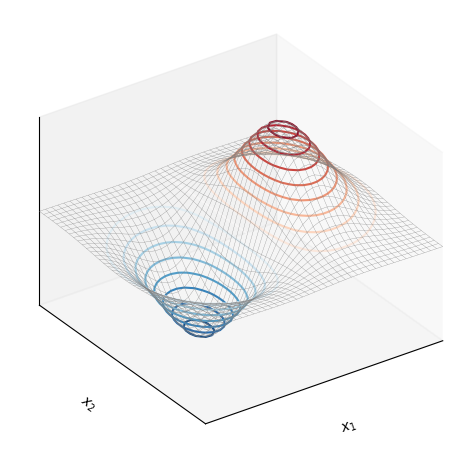

In [11]:
ax = plt.figure().add_subplot(projection='3d')  # 创建 3D 图形并添加子图
ax.plot_wireframe(xx1, xx2, ff_x, rstride=1,  # 绘制线框图
                  cstride=1, color=[0.5, 0.5, 0.5],  # 设置线框颜色
                  linewidth=0.2)  # 设置线框宽度
ax.contour3D(xx1, xx2, ff_x, 20, cmap='RdBu_r')  # 绘制 3D 等高线图，使用‘RdBu_r’颜色映射

# 去除坐标轴刻度
ax.xaxis.set_ticks([])  # 去除 x 轴刻度
ax.yaxis.set_ticks([])  # 去除 y 轴刻度
ax.zaxis.set_ticks([])  # 去除 z 轴刻度
plt.xlim(-2, 2)  # 设置 x 轴范围
plt.ylim(-2, 2)  # 设置 y 轴范围
ax.set_proj_type('ortho')
ax.view_init(30, -125)  # 设置视角角度
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
ax.set_zlabel('$f(x_1,x_2)$')  # 设置 z 轴标签
plt.tight_layout()  # 调整布局以适应图形窗口

## 2D 可视化

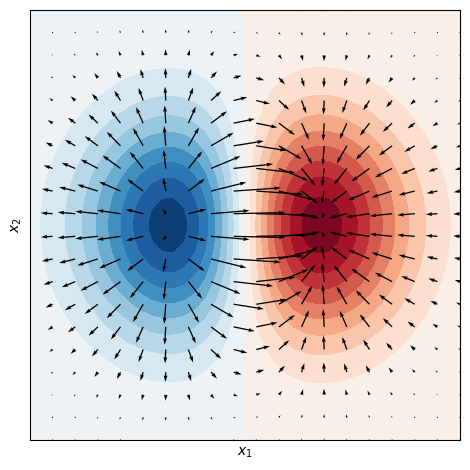

In [13]:
fig, ax = plt.subplots()  # 创建 2D 图形

plt.contourf(xx1, xx2, ff_x, 20, cmap='RdBu_r')  # 绘制填充的等高线图

plt.quiver(xx1_, xx2_, V[0], V[1],  # 绘制梯度矢量场
            angles='xy', scale_units='xy',  # 设置矢量的角度和缩放单位
            edgecolor='none', facecolor='k')  # 设置矢量的颜色
ax.set_aspect('equal')  # 设置图形的纵横比
ax.xaxis.set_ticks([])  # 去除 x 轴刻度
ax.yaxis.set_ticks([])  # 去除 y 轴刻度
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
plt.tight_layout()  # 调整布局以适应图形窗口